In [1]:
import networkx as nx
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

Reading the graphml file of the existing graph and taking it into memory using networkx

In [3]:
filename = "/Users/arefindk/Desktop/github_merged_pull/trimmed_follow_users_strong_int_with_communities.graphml"
G = nx.read_graphml(filename)

Some color description for the pie charts coming up later.

In [4]:
cnames = {
'aliceblue':            '#F0F8FF',
'antiquewhite':         '#FAEBD7',
'aqua':                 '#00FFFF',
'aquamarine':           '#7FFFD4',
'azure':                '#F0FFFF',
'beige':                '#F5F5DC',
'bisque':               '#FFE4C4',
'black':                '#000000',
'blanchedalmond':       '#FFEBCD',
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chartreuse':           '#7FFF00',
'chocolate':            '#D2691E',
'coral':                '#FF7F50',
'cornflowerblue':       '#6495ED',
'cornsilk':             '#FFF8DC',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'lavender':             '#E6E6FA',
'lavenderblush':        '#FFF0F5',
'lawngreen':            '#7CFC00',
'lemonchiffon':         '#FFFACD',
'lightblue':            '#ADD8E6',
'lightcoral':           '#F08080',
'lightcyan':            '#E0FFFF',
'lightgoldenrodyellow': '#FAFAD2',
'lightgreen':           '#90EE90',
'lightgray':            '#D3D3D3',
'lightpink':            '#FFB6C1',
'lightsalmon':          '#FFA07A',
'lightseagreen':        '#20B2AA',
'lightskyblue':         '#87CEFA',
'lightslategray':       '#778899',
'lightsteelblue':       '#B0C4DE',
'lightyellow':          '#FFFFE0',
'lime':                 '#00FF00',
'limegreen':            '#32CD32',
'linen':                '#FAF0E6',
'magenta':              '#FF00FF',
'maroon':               '#800000',
'mediumaquamarine':     '#66CDAA',
'mediumblue':           '#0000CD',
'mediumorchid':         '#BA55D3',
'mediumpurple':         '#9370DB',
'mediumseagreen':       '#3CB371',
'mediumslateblue':      '#7B68EE',
'mediumspringgreen':    '#00FA9A',
'mediumturquoise':      '#48D1CC',
'mediumvioletred':      '#C71585',
'midnightblue':         '#191970',
'mintcream':            '#F5FFFA',
'mistyrose':            '#FFE4E1',
'moccasin':             '#FFE4B5',
'navajowhite':          '#FFDEAD',
'navy':                 '#000080',
'oldlace':              '#FDF5E6',
'olive':                '#808000',
'olivedrab':            '#6B8E23',
'orange':               '#FFA500',
'orangered':            '#FF4500',
'orchid':               '#DA70D6',
'palegoldenrod':        '#EEE8AA',
'palegreen':            '#98FB98',
'paleturquoise':        '#AFEEEE',
'palevioletred':        '#DB7093',
'papayawhip':           '#FFEFD5',
'peachpuff':            '#FFDAB9',
'peru':                 '#CD853F',
'pink':                 '#FFC0CB',
'plum':                 '#DDA0DD',
'powderblue':           '#B0E0E6',
'purple':               '#800080',
'red':                  '#FF0000',
'rosybrown':            '#BC8F8F',
'royalblue':            '#4169E1',
'saddlebrown':          '#8B4513',
'salmon':               '#FA8072',
'sandybrown':           '#FAA460',
'seagreen':             '#2E8B57',
'seashell':             '#FFF5EE',
'sienna':               '#A0522D',
'silver':               '#C0C0C0',
'skyblue':              '#87CEEB',
'slateblue':            '#6A5ACD',
'slategray':            '#708090',
'snow':                 '#FFFAFA',
'springgreen':          '#00FF7F',
'steelblue':            '#4682B4',
'tan':                  '#D2B48C',
'teal':                 '#008080',
'thistle':              '#D8BFD8',
'tomato':               '#FF6347',
'turquoise':            '#40E0D0',
'violet':               '#EE82EE',
'wheat':                '#F5DEB3',
'white':                '#FFFFFF',
'whitesmoke':           '#F5F5F5',
'yellow':               '#FFFF00',
'yellowgreen':          '#9ACD32'}

Now creating a dictionary where each key is a programming language and each value is the number of github users use it as a preferred language.

In [5]:
community_sizes_lang = Counter(nx.get_node_attributes(G,'lang').values())
print community_sizes_lang

Counter({u'JavaScript': 39479, u'Python': 22596, u'Ruby': 20471, u'Java': 15755, u'PHP': 12580, u'C': 8732, u'Objective-C': 6345, u'C++': 4515, u'C#': 4283, u'Shell': 2800, u'CSS': 2355, u'Go': 2041, u'HTML': 1210, u'Perl': 1118, u'Scala': 1101, u'Clojure': 858, u'VimL': 852, u'Haskell': 775, u'R': 669, u'CoffeeScript': 598, u'Emacs Lisp': 494, u'Lua': 456, u'Erlang': 436, u'Swift': 392, u'TeX': 363, u'Groovy': 331, u'ActionScript': 287, u'Common Lisp': 180, u'Arduino': 167, u'Puppet': 167, u'Matlab': 167, u'Rust': 165, u'OCaml': 121, u'Haxe': 119, u'F#': 105, u'Processing': 103, u'Elixir': 89, u'Dart': 86, u'ColdFusion': 81, u'Racket': 71, u'D': 66, u'Pascal': 64, u'Julia': 61, u'TypeScript': 60, u'Apex': 60, u'Visual Basic': 57, u'PowerShell': 57, u'Scheme': 55, u'Assembly': 47, u'FORTRAN': 36, u'ApacheConf': 34, u'Logos': 33, u'Makefile': 31, u'ASP': 29, u'Delphi': 23, u'Tcl': 23, u'VHDL': 23, u'Eagle': 23, u'SuperCollider': 20, u'Prolog': 19, u'XQuery': 19, u'Max': 18, u'Standard M

Now getting the percentage of top 9 languages used by those users and the percentage of languages used other than the top 9 languages

12.9814863844
[25.493513454174444, 14.591337926759183, 13.219121910899592, 10.173770978761326, 8.123518813888763, 5.638677764934553, 4.0972755861783945, 2.915555440755784, 2.7657417392595844]
['JavaScript 25.49%', 'Python 14.59%', 'Ruby 13.22%', 'Java 10.17%', 'PHP 8.12%', 'C 5.64%', 'Objective-C 4.10%', 'C++ 2.92%', 'C# 2.77%', 'Others 12.98%']


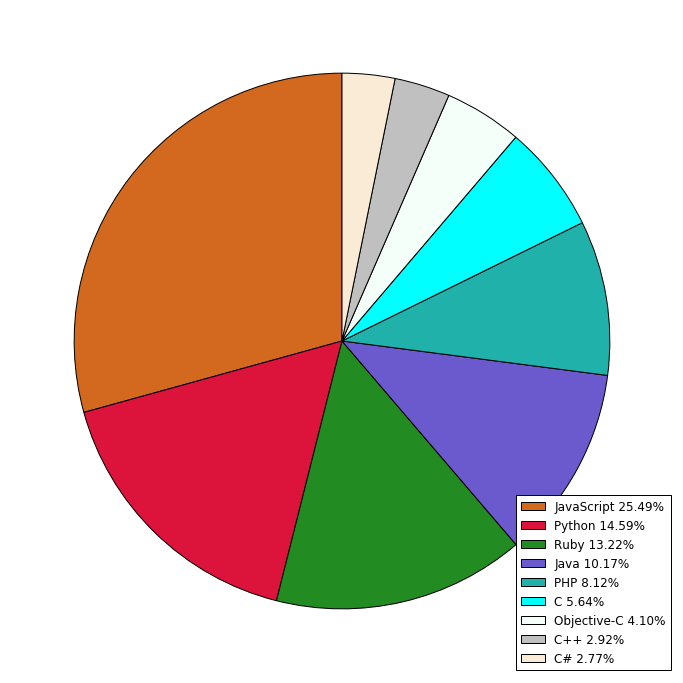

In [6]:
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
num_nodes = G.number_of_nodes()
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()

Now finding out the largest community detected by louvain algorithm and creating an induced graph of the largest community discovered by louvain algorithm. Seeing if there is a huge chunk of users who use a single language in that community.

Counter({4: 20768, 8: 19672, 15: 15999, 7: 15573, 2: 15534, 10: 13773, 6: 5127, 5: 5061, 9: 4377, 19: 3909, 25: 3764, 3: 2451, 13: 2307, 37: 2144, 23: 2141, 14: 1872, 16: 1751, 24: 1480, 34: 1122, 21: 1116, 42: 975, 12: 973, 51: 878, 32: 793, 27: 791, 38: 720, 20: 685, 46: 635, 18: 594, 39: 535, 31: 507, 30: 486, 11: 484, 41: 484, 36: 461, 26: 426, 0: 358, 35: 357, 17: 309, 52: 296, 50: 278, 63: 277, 22: 256, 49: 163, 29: 115, 91: 112, 61: 88, 28: 63, 60: 61, 76: 58, 40: 45, 56: 43, 77: 40, 1: 36, 64: 34, 67: 32, 83: 32, 53: 31, 58: 25, 92: 24, 96: 24, 115: 24, 141: 24, 47: 21, 65: 21, 95: 21, 45: 18, 88: 18, 174: 18, 125: 17, 33: 16, 44: 16, 104: 16, 107: 16, 119: 16, 162: 16, 43: 15, 161: 15, 73: 14, 99: 14, 128: 14, 146: 14, 209: 14, 100: 13, 101: 13, 120: 13, 57: 12, 109: 12, 124: 12, 133: 12, 158: 12, 71: 11, 80: 11, 90: 11, 144: 11, 155: 11, 190: 11, 98: 10, 111: 10, 112: 10, 139: 10, 142: 10, 160: 10, 165: 10, 180: 10, 194: 10, 195: 10, 68: 9, 87: 9, 117: 9, 121: 9, 138: 9, 156:

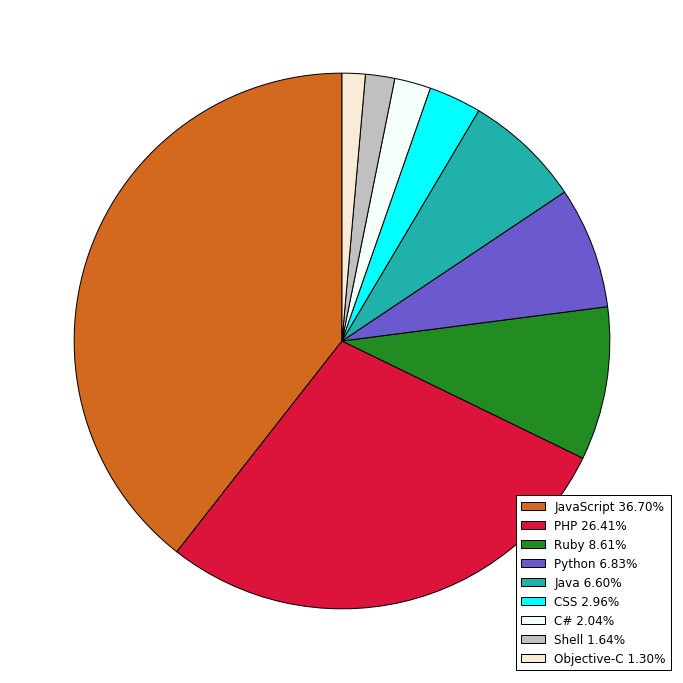

In [7]:
#Creating the list of vertices in largest louvain community
community_sizes_louvain = Counter(nx.get_node_attributes(G,'louvain_community').values())
print community_sizes_louvain
sorted_louvains = sorted(community_sizes_louvain, key = community_sizes_louvain.get, reverse = True)
print sorted_louvains
largest_community_louvain = [k for k,v in nx.get_node_attributes(G,'louvain_community').iteritems() if v == sorted_louvains[0]]
print len(largest_community_louvain)

## Inducing the subgraph of largest louvain community
subgraph_big_louvain = G.subgraph(largest_community_louvain)
community_sizes_lang = Counter(nx.get_node_attributes(subgraph_big_louvain,'lang').values())
num_nodes = subgraph_big_louvain.number_of_nodes()
print community_sizes_lang


## Creating pie-charts
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()

Now finding out the largest community detected by infomap algorithm and creating an induced graph of the largest community discovered by infomap algorithm. Seeing if there is a huge chunk of users who use a single language in that community.

Counter({0: 17185, 2: 15408, 12: 6168, 5: 5666, 1: 5485, 7: 5380, 3: 5061, 47: 4028, 4: 3547, 25: 2606, 8: 2532, 13: 2499, 6: 2301, 18: 2232, 22: 2231, 10: 2173, 9: 2042, 32: 1920, 15: 1866, 16: 1810, 28: 1782, 19: 1698, 20: 1654, 14: 1614, 21: 1510, 17: 1314, 11: 1226, 39: 1150, 31: 1019, 26: 1004, 23: 904, 37: 894, 27: 864, 43: 844, 30: 794, 49: 743, 24: 733, 42: 725, 60: 689, 67: 685, 40: 659, 34: 655, 56: 642, 69: 624, 53: 598, 45: 570, 35: 560, 80: 553, 64: 521, 72: 512, 94: 506, 50: 502, 54: 498, 77: 490, 38: 487, 83: 459, 70: 456, 29: 454, 87: 449, 33: 447, 102: 443, 68: 441, 59: 438, 84: 423, 91: 419, 48: 418, 107: 412, 52: 403, 81: 392, 104: 385, 116: 383, 92: 377, 46: 369, 44: 363, 51: 356, 55: 346, 36: 345, 57: 344, 79: 336, 95: 336, 41: 332, 90: 326, 65: 324, 101: 323, 96: 316, 88: 310, 62: 309, 111: 302, 120: 301, 115: 287, 89: 280, 130: 279, 125: 274, 71: 269, 98: 268, 122: 254, 66: 246, 112: 245, 76: 242, 128: 241, 63: 240, 73: 237, 86: 235, 97: 235, 82: 228, 58: 227, 13

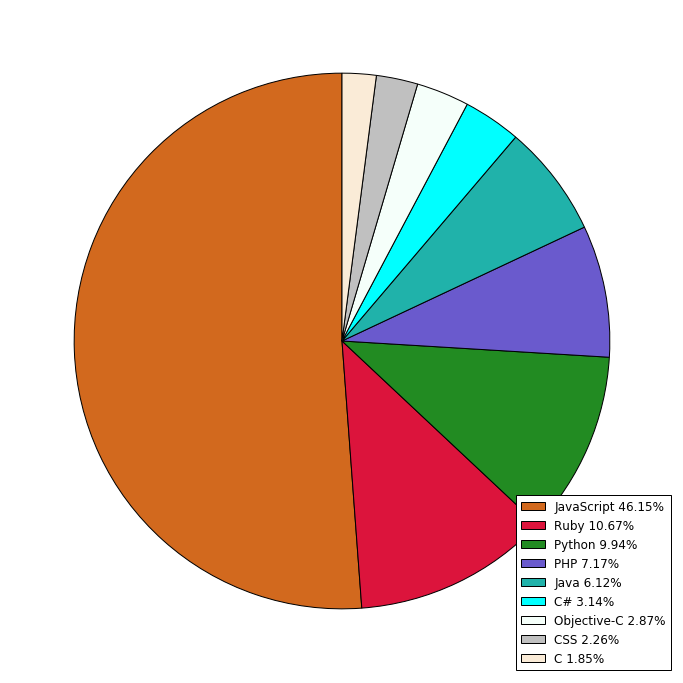

In [8]:
#Creating the list of vertices in largest infomap community
community_sizes_infomap = Counter(nx.get_node_attributes(G,'infomap_community').values())
print community_sizes_infomap
sorted_infomaps = sorted(community_sizes_infomap, key = community_sizes_infomap.get, reverse = True)
print sorted_infomaps
largest_community_infomap = [k for k,v in nx.get_node_attributes(G,'infomap_community').iteritems() if v == sorted_infomaps[0]]
print len(largest_community_infomap)

## Inducing the subgraph of largest infomap community
subgraph_big_infomap = G.subgraph(largest_community_infomap)
community_sizes_lang = Counter(nx.get_node_attributes(subgraph_big_infomap,'lang').values())
num_nodes = subgraph_big_infomap.number_of_nodes()
print community_sizes_lang


## Creating pie-charts
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()

### Finding influencers using page-rank algorithm

In [9]:
pr = nx.pagerank(G)
pr_sorted = sorted(pr, key=pr.get, reverse= True)
print pr_sorted[:5]
for node in pr_sorted[:5]:
    print G.node[node]['login'], G.node[node]['lang']

['134499', '45875', '82010', '56779', '60117']
mattt Objective-C
kennethreitz Python
JakeWharton Java
paulirish JavaScript
addyosmani JavaScript


Now lets create a language usage pie chart for top 20K influencers.

['134499', '45875', '82010', '56779', '60117']
Counter({u'JavaScript': 5302, u'Python': 3193, u'Ruby': 3130, u'Java': 1473, u'PHP': 1307, u'C': 958, u'Objective-C': 779, u'C++': 598, u'C#': 392, u'Go': 382, u'Shell': 250, u'Haskell': 246, u'Scala': 227, u'Clojure': 221, u'Perl': 220, u'CSS': 172, u'Erlang': 114, u'VimL': 89, u'Emacs Lisp': 78, u'CoffeeScript': 72, u'HTML': 69, u'R': 67, u'Lua': 57, u'OCaml': 47, u'Rust': 42, u'Common Lisp': 36, u'ActionScript': 35, u'Groovy': 32, u'Haxe': 32, u'TeX': 28, u'F#': 26, u'Swift': 25, u'Elixir': 22, u'Puppet': 21, u'Dart': 18, u'Julia': 18, u'Racket': 17, u'Arduino': 13, u'Scheme': 12, u'D': 11, u'Matlab': 11, u'Processing': 8, u'Agda': 7, u'Assembly': 7, u'Pascal': 7, u'Apex': 7, u'XQuery': 7, u'TypeScript': 6, u'Standard ML': 6, u'ColdFusion': 6, u'SuperCollider': 5, u'PowerShell': 5, u'Objective-J': 4, u'Visual Basic': 4, u'Prolog': 4, u'Nimrod': 4, u'Coq': 4, u'Logos': 3, u'Mathematica': 3, u'FORTRAN': 3, u'AppleScript': 2, u'Elm': 2, u'

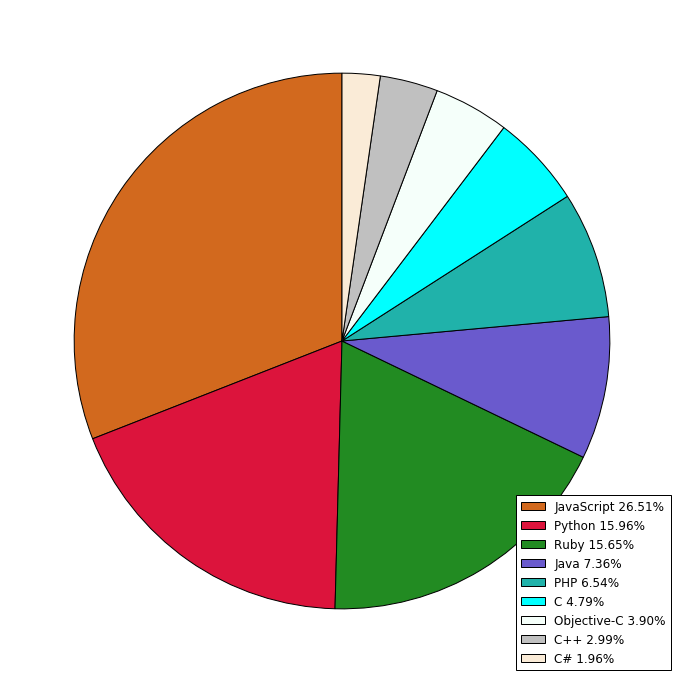

In [10]:
top20k = pr_sorted[:20000]
print top20k[:5]

## Inducing the subgraph of largest infomap community
subgraph_influencers = G.subgraph(top20k)
community_sizes_lang = Counter(nx.get_node_attributes(subgraph_influencers,'lang').values())
num_nodes = subgraph_influencers.number_of_nodes()
print community_sizes_lang


## Creating pie-charts
values_langs = sorted(community_sizes_lang.values(),reverse=True)[:9]
values_langs= [x/float(num_nodes)*100 for x in values_langs]
others_percentage = 100 - sum(values_langs)
print others_percentage
print values_langs

sorted_langs = sorted(community_sizes_lang, key=community_sizes_lang.get, reverse = True)
labels_langs = list()
for i,percentage in enumerate(values_langs):
    labels_langs.append(str(sorted_langs[i]) +" "+ "%2.2f" %percentage+"%")
others_string = "Others"+" "+ "%2.2f" %others_percentage+"%"
labels_langs.append(others_string)
print labels_langs

fig = plt.figure(figsize=(12,12))

a=np.random.random(40)
cs=cm.Set1(np.arange(40)/40.)

cols = cnames.values()[39:63]

patches, texts = plt.pie([float(v) for v in values_langs], startangle=90,
           autopct=None, colors = cols)
plt.legend(patches, labels_langs, loc=4)
plt.show()
subgraph_influencers = G.subgraph(top20k)